In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('googleplaystore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.dropna(inplace = True)

In [5]:
data.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [6]:
# cleaning category
data['Category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10834                 FAMILY
10836                 FAMILY
10837                 FAMILY
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 9360, dtype: object

In [7]:
xc = data['Category'].unique()
xc

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [8]:
#encoding category
category = {}
for i in range(0,len(xc)):
    category[xc[i]]=i

In [9]:
#apply to the column
data['Category_encode'] = data['Category'].map(category) 

In [10]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_encode
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,0
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,0
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,0
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,0
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,0


In [11]:
# cleaning Size
xs = data['Size'].unique()
xs

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [12]:
x3 = xs[1][:-1]
x3

'14'

In [13]:
def size_change(x):
    if 'M' in x:
      
        return (float(x[:-1])*1000000)
    elif 'k' in x:
        return (float(x[:-1])*1000)
    else:
        return None

In [14]:
data['Size'] = data['Size'].map(size_change)

In [15]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_encode
0,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,0
1,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,0
2,ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,0
4,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,0


In [16]:
data['Installs'] = [int(i[:-1].replace(',','')) for i in data['Installs']]

In [17]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_encode
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,0
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,0


In [18]:
def type_change(x):
    if x == 'Free':
        return 0
    else:
        return 1
data['Type'] = data['Type'].map(type_change)

In [19]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_encode
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0,Everyone,Art & Design,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0,Everyone,Art & Design;Pretend Play,0
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0,Everyone,Art & Design,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0,Teen,Art & Design,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0,Everyone,Art & Design;Creativity,0


In [20]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [21]:
content = {}
for i in range(0, len(data['Content Rating'].unique())):
    content[data['Content Rating'].unique()[i]] = i

In [22]:
data['Content Rating'] = data['Content Rating'].map(content)

In [23]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_encode
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0,0,Art & Design,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0,0,Art & Design;Pretend Play,0
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0,0,Art & Design,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0,1,Art & Design,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0,0,Art & Design;Creativity,0


In [24]:

data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [25]:
# return the the price w/ $
def price_change(x):
    if x == '0':
        return 0
    else:
        x = x[1:]
        x = float(x)
        return x

In [26]:
data['Price'] = data['Price'].map(price_change).astype(float)

In [27]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_encode
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0


In [28]:
data['Reviews'].astype(int)

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int32

In [29]:
xg = data['Genres'].unique()

In [30]:
genres = {}
for i in range(len(xg)):
    genres[xg[i]] = i

In [31]:
data['Genres_encoded'] = data['Genres'].map(genres).astype(int)

In [32]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_encode,Genres_encoded
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


In [33]:
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
X = data.drop(labels = ['Category','Rating','Genres','Genres_encoded'],axis = 1)

In [35]:
X

,Reviews,Size,Installs,Type,Price,Content Rating,Category_encode
0,159,19000000.0,10000,0,0.0,0,0
1,967,14000000.0,500000,0,0.0,0,0
2,87510,8700000.0,5000000,0,0.0,0,0
3,215644,25000000.0,50000000,0,0.0,1,0
4,967,2800000.0,100000,0,0.0,0,0
...,...,...,...,...,...,...,...
10834,7,2600000.0,500,0,0.0,0,18
10836,38,53000000.0,5000,0,0.0,0,18
10837,4,3600000.0,100,0,0.0,0,18
10839,114,NaN,1000,0,0.0,3,3


In [36]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_encode,Genres_encoded
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


In [37]:
y = data.Rating

In [38]:
y

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

In [39]:
data.dropna()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_encode,Genres_encoded
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2
...,...,...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,4.8,44,619000.0,1000,0,0.0,0,Books & Reference,3,5
10834,FAMILY,4.0,7,2600000.0,500,0,0.0,0,Education,18,12
10836,FAMILY,4.5,38,53000000.0,5000,0,0.0,0,Education,18,12
10837,FAMILY,5.0,4,3600000.0,100,0,0.0,0,Education,18,12


In [40]:
data.drop(labels = ['Category','Rating','Genres','Genres_encoded'],axis = 1)

,Reviews,Size,Installs,Type,Price,Content Rating,Category_encode
0,159,19000000.0,10000,0,0.0,0,0
1,967,14000000.0,500000,0,0.0,0,0
2,87510,8700000.0,5000000,0,0.0,0,0
3,215644,25000000.0,50000000,0,0.0,1,0
4,967,2800000.0,100000,0,0.0,0,0
...,...,...,...,...,...,...,...
10834,7,2600000.0,500,0,0.0,0,18
10836,38,53000000.0,5000,0,0.0,0,18
10837,4,3600000.0,100,0,0.0,0,18
10839,114,NaN,1000,0,0.0,3,3


In [53]:
from sklearn.linear_model import LinearRegression
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [56]:
X = data.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = data.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

C:\Users\Sajjad\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


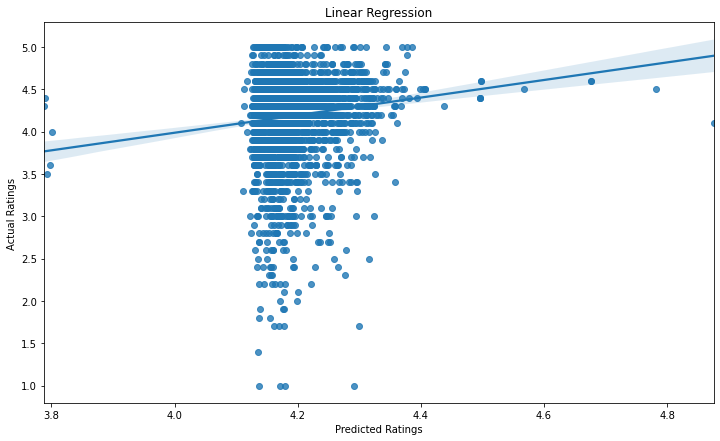

In [58]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test)
plt.title('Linear Regression')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [59]:
from sklearn import svm

In [63]:
X = data.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = data.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)

svm_model = svm.SVR()
svm_model.fit(X_train,y_train)
svm_Results = svm_model.predict(X_test)

C:\Users\Sajjad\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


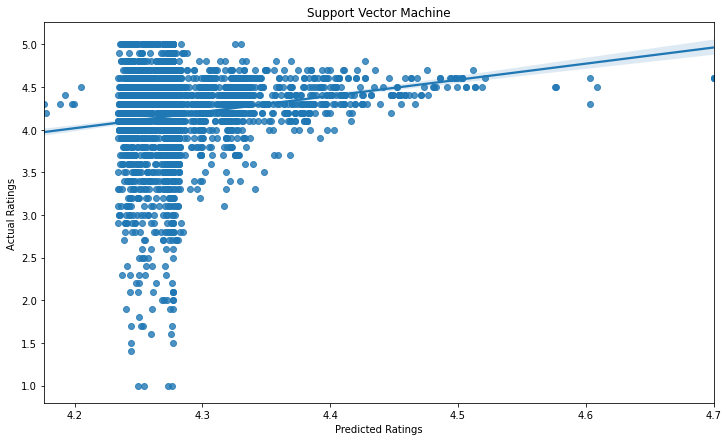

In [65]:
plt.figure(figsize=(12,7))
sns.regplot(svm_Results,y_test)
plt.title('Support Vector Machine')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
X = data.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = data.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)

rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
rf_Results = rf_model.predict(X_test)

C:\Users\Sajjad\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


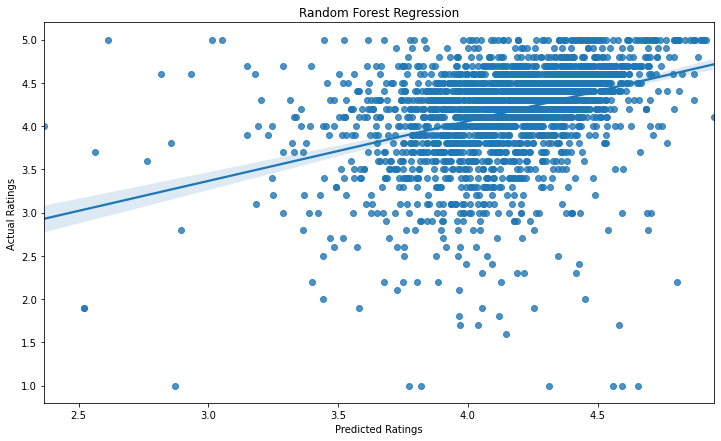

In [69]:
plt.figure(figsize=(12,7))
sns.regplot(rf_Results,y_test)
plt.title('Random Forest Regression')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

Results are, (In case if we want to get statiscal results from them)
for Linear Regression --> Results
for Support Vector Machine --> svm_Results
for Random Forest regression --> rf_Results